# 数据分析

In [294]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels import PanelOLS

## 读取数据

In [295]:
# 读取数据
df = pd.read_excel("./final_data.xls")
# 查看数据概况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stk_cd       9995 non-null   int64  
 1   CSR          9995 non-null   float64
 2   Performance  9995 non-null   float64
 3   SOE          9995 non-null   float64
 4   SIZE         9995 non-null   float64
 5   负债水平         9995 non-null   float64
 6   YEAR         9995 non-null   int64  
 7   TOP10        9995 non-null   float64
 8   F050201B     9995 non-null   float64
 9   BP           9995 non-null   float64
 10  F050502B     9995 non-null   float64
 11  F051201B     9995 non-null   float64
 12  TOBINQ       9995 non-null   float64
 13  F010101A     9995 non-null   float64
 14  F010201A     9995 non-null   float64
 15  LEV          9995 non-null   float64
 16  F011401A     9995 non-null   float64
 17  IND          9995 non-null   int64  
dtypes: float64(15), int64(3)
memory usage: 1.4 MB


In [296]:
from scipy.stats.mstats import winsorize

df['BP'] = winsorize(df['BP'], limits=[0.01, 0.01])
print(df)

      Stk_cd    CSR  Performance       SOE       SIZE      负债水平  YEAR  TOP10  \
0          2  76.52       8.2292  0.000000  27.351214  0.810123  2016  57.40   
1          8  21.29       3.0131  0.010889  22.692695  0.182457  2016  40.42   
2         11  38.97      -0.0955  0.663507  22.617843  0.692242  2016  66.55   
3         12  72.45       3.1158  0.000000  23.552240  0.513330  2016  32.13   
4         14  28.67      -1.0270  0.000000  21.498907  0.655892  2016  52.79   
...      ...    ...          ...       ...        ...       ...   ...    ...   
9990  603988  28.11      22.7413  0.000000  21.002087  0.426588  2020  67.87   
9991  603989  25.51      10.5181  0.000000  22.078823  0.334527  2020  74.30   
9992  603997   7.29      -7.4037  0.000000  23.579522  0.754537  2020  85.63   
9993  603998  27.31       5.2548  0.000000  21.448076  0.408192  2020  51.93   
9994  603999  16.20       3.2931  0.000000  21.472300  0.167235  2020  64.62   

      F050201B        BP  F050502B  F05

In [297]:
# 创建虚拟变量（年份）
year_dummies = pd.get_dummies(df['YEAR'], prefix='YEAR', drop_first=True)
# 合并虚拟变量到原始数据
data_with_dummies = pd.concat([df, year_dummies], axis=1)
# 设置双重索引
data_with_dummies = data_with_dummies.set_index(["Stk_cd", "YEAR"])

In [298]:
print(data_with_dummies)

               CSR  Performance       SOE       SIZE      负债水平  TOP10  \
Stk_cd YEAR                                                             
2      2016  76.52       8.2292  0.000000  27.351214  0.810123  57.40   
8      2016  21.29       3.0131  0.010889  22.692695  0.182457  40.42   
11     2016  38.97      -0.0955  0.663507  22.617843  0.692242  66.55   
12     2016  72.45       3.1158  0.000000  23.552240  0.513330  32.13   
14     2016  28.67      -1.0270  0.000000  21.498907  0.655892  52.79   
...            ...          ...       ...        ...       ...    ...   
603988 2020  28.11      22.7413  0.000000  21.002087  0.426588  67.87   
603989 2020  25.51      10.5181  0.000000  22.078823  0.334527  74.30   
603997 2020   7.29      -7.4037  0.000000  23.579522  0.754537  85.63   
603998 2020  27.31       5.2548  0.000000  21.448076  0.408192  51.93   
603999 2020  16.20       3.2931  0.000000  21.472300  0.167235  64.62   

             F050201B        BP  F050502B  F051201

## 描述性分析和相关性分析

In [299]:
df = df.set_index(["Stk_cd", "YEAR"])
# 描述性分析
print(df.describe())
# 相关性分析
print(df.corr())
# # 绘制相关性热图
# import seaborn as sns
# sns.heatmap(df.corr(), annot=True, cmap="Blues")
# # 描述性分析
# print(data_with_dummies.describe())
# # 相关性分析
# print(data_with_dummies.corr())
# # 绘制相关性热图
# import seaborn as sns
#
# sns.heatmap(data_with_dummies.corr(), annot=True, cmap="Blues")

               CSR  Performance          SOE         SIZE         负债水平  \
count  9995.000000  9995.000000  9995.000000  9995.000000  9995.000000   
mean     21.625906     3.928647     0.023810    22.536999     0.420806   
std      11.992261    31.878835     0.091314     1.326615     0.198135   
min     -18.450000 -1726.338300     0.000000    15.921008     0.006171   
25%      15.980000     1.504700     0.000000    21.613837     0.263168   
50%      21.370000     3.834400     0.000000    22.347119     0.414518   
75%      26.385000     7.257650     0.000000    23.289855     0.565300   
max      87.020000   241.779600     0.841543    28.624722     1.169331   

             TOP10     F050201B           BP     F050502B     F051201B  \
count  9995.000000  9995.000000  9995.000000  9995.000000  9995.000000   
mean     57.301804     0.035412     0.059863     0.066510     0.052053   
std      14.507261     0.074593     0.113373     0.142918     0.100058   
min      15.930000    -1.647913    -0

d:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20538 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 36127 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20538 missing from current font.
  font.set_text(s, 0, fla

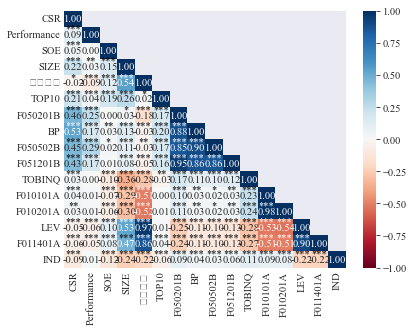

In [300]:
# here put the import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import matplotlib as mpl


def cm2inch(x, y):
    return x / 2.54, y / 2.54


size1 = 10.5
mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        "font.family": 'serif',
        "font.size": size1,
        "font.serif": ['Times New Roman'],
    }
)
fontdict = {'weight': 'bold', 'size': size1, 'family': 'SimHei'}

df_coor = df.corr()
fig = plt.figure(figsize=(cm2inch(16, 12)))
ax1 = plt.gca()

#构造mask，去除重复数据显示
mask = np.zeros_like(df_coor)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask) - 1) * (-1)
mask = np.rot90(mask, k=-1)

im1 = sns.heatmap(df_coor, annot=True, cmap="RdBu"
                  , mask=mask  #构造mask，去除重复数据显示
                  , vmax=1, vmin=-1
                  , fmt='.2f', ax=ax1)

ax1.tick_params(axis='both', length=0)

#计算相关性显著性并显示
rlist = []
plist = []
for i in df.columns.values:
    for j in df.columns.values:
        r, p = pearsonr(df[i], df[j])
        rlist.append(r)
        plist.append(p)

rarr = np.asarray(rlist).reshape(len(df.columns.values), len(df.columns.values))
parr = np.asarray(plist).reshape(len(df.columns.values), len(df.columns.values))
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()

widthx = 0
widthy = -0.15

for m in ax1.get_xticks():
    for n in ax1.get_yticks():
        pv = (parr[int(m), int(n)])
        rv = (rarr[int(m), int(n)])
        if mask2[int(m), int(n)] < 1.:
            if abs(rv) > 0.5:
                if pv < 0.05 and pv >= 0.01:
                    ax1.text(n + widthx, m + widthy, '*', ha='center', color='white')
                if pv < 0.01 and pv >= 0.001:
                    ax1.text(n + widthx, m + widthy, '**', ha='center', color='white')
                if pv < 0.001:
                    # print([int(m),int(n)])
                    ax1.text(n + widthx, m + widthy, '***', ha='center', color='white')
            else:
                if pv < 0.05 and pv >= 0.01:
                    ax1.text(n + widthx, m + widthy, '*', ha='center', color='k')
                elif pv < 0.01 and pv >= 0.001:
                    ax1.text(n + widthx, m + widthy, '**', ha='center', color='k')
                elif pv < 0.001:
                    ax1.text(n + widthx, m + widthy, '***', ha='center', color='k')
plt.savefig(r'D:\学期\大三春\计量经济学\大作业\成品\fig\r_demo.png', dpi=600)
plt.show()

## 固定效应模型

In [301]:
# 建立固定效应模型
model_fe = PanelOLS(data_with_dummies['BP'],
                    data_with_dummies[
                        ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018',
                         'YEAR_2019', 'YEAR_2020']],
                    entity_effects=True)  # 使用entity_effects参数启用固定效应
# 拟合模型
results_fe = model_fe.fit()
# 查看回归结果
results_fe.summary

Dep. Variable:,BP,R-squared:,0.2295
Estimator:,PanelOLS,R-squared (Between):,-15.114
No. Observations:,9995,R-squared (Within):,0.2295
Date:,"Sun, May 21 2023",R-squared (Overall):,-8.3129
Time:,01:35:18,Log-likelihood,1.172e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,216.25
Entities:,1999,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(11,7985)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,216.25


## 随机效应模型

In [302]:
from linearmodels import RandomEffects

# 建立随机效应模型
model_re = RandomEffects(data_with_dummies['BP'],
                         data_with_dummies[
                             ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018',
                              'YEAR_2019',
                              'YEAR_2020']])
# 拟合模型
results_re = model_re.fit()
# 查看回归结果
results_re.summary

Dep. Variable:,BP,R-squared:,0.3868
Estimator:,RandomEffects,R-squared (Between):,0.6719
No. Observations:,9995,R-squared (Within):,0.1963
Date:,"Sun, May 21 2023",R-squared (Overall):,0.4611
Time:,01:35:18,Log-likelihood,1.03e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,572.50
Entities:,1999,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(11,9984)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,572.50


## 稳健性检验

In [303]:
# robust_fe_results = model_fe.fit(cov_type='robust')
# print(robust_fe_results)

## B-P 检验

In [304]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf

# 读取回归模型的残差和预测值读取回归模型的残差和预测值
results_ols = smf.ols('BP ~ CSR + SIZE + LEV + SOE + IND + YEAR_2017 + YEAR_2018 + YEAR_2019 + YEAR_2020',
                      data=data_with_dummies).fit()
residuals = results_ols.resid
# residuals = results_re.resids

# 获取预测值
predicted_values = results_ols.predict()
# predicted_values = results_re.predict()

# 进行B-P检验
bp_test = het_breuschpagan(residuals, sm.add_constant(predicted_values))

# 输出B-P检验结果
print("BP Test Statistic:", bp_test[0])
print("BP p-value:", bp_test[1])
print("BP Test Results:", bp_test[2:])

BP Test Statistic: 319.7141957216088
BP p-value: 1.6716897729517413e-71
BP Test Results: (330.2128766504506, 1.2668484199090472e-72)


## 进行Hausman检验

In [305]:
# Hausman检验
from linearmodels.panel import compare

comparison = compare({'FE': results_fe, 'RE': results_re})
print(comparison.summary)

                    Model Comparison                    
                                    FE                RE
--------------------------------------------------------
Dep. Variable                       BP                BP
Estimator                     PanelOLS     RandomEffects
No. Observations                  9995              9995
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.2295            0.3868
R-Squared (Within)              0.2295            0.1963
R-Squared (Between)            -15.114            0.6719
R-Squared (Overall)            -8.3129            0.4611
F-statistic                     216.25            572.50
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
CSR                             0.0039            0.0048
                              (38.462)          (53.825)
SIZE                            0.0146           -0.0050
                              (

In [306]:
# 1. 运用计量书本上的公式，自编函数， 因为目前 Python 里面没有现成的模块
import numpy.linalg as la
from scipy import stats


def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval


# 2. 将fe,re结果带入自编函数之中。
hausman_results = hausman(results_fe, results_re)
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

# 3. 看结果，如果这儿的 p-Value 小于 10%，则支持 固定效应 模型。

chi-Squared: 605.2878454310777
degrees of freedom: 11
p-Value: 1.0357038340478543e-122


In [307]:
b_fe = results_fe.params
b_re = results_re.params
b_diff = b_fe - b_re
v_fe = results_fe.cov
v_re = results_re.cov
v_diff = v_fe - v_re
df = len(b_fe)

table = pd.DataFrame({'FE': b_fe, 'RE': b_re, 'Difference': b_diff, 'sqrt(diag(v_fe-v_re))': np.sqrt(np.diag(v_diff))})
chi2 = np.dot(b_diff.T, np.linalg.inv(v_diff).dot(b_diff))
pval = 1 - stats.chi2.cdf(chi2, df)

print(table)
print()
print(f'chi-Squared: {chi2:.2f}')
print(f'degrees of freedom: {df}')
print(f'p-Value:{pval:.5f}')

                 FE        RE  Difference  sqrt(diag(v_fe-v_re))
CSR        0.003923  0.004777   -0.000854               0.000050
SIZE       0.014630 -0.004987    0.019617               0.003962
LEV       -0.267362 -0.042232   -0.225130               0.012346
TOBINQ     0.006211  0.004820    0.001391               0.000749
TOP10      0.001400  0.000773    0.000626               0.000199
SOE       -0.027932  0.006909   -0.034841               0.010750
IND        0.035858  0.012144    0.023714               0.010162
YEAR_2017  0.038776  0.043657   -0.004881               0.000549
YEAR_2018  0.027994  0.032241   -0.004247               0.001231
YEAR_2019  0.026734  0.031144   -0.004410               0.001431
YEAR_2020  0.019614  0.023470   -0.003855               0.001850

chi-Squared: 605.29
degrees of freedom: 11
p-Value:0.00000
